In [1]:

import pygamma
import pylab
import numpy as np
import nmrglue
from pygamma import spin_system, Hcs, HJw, Fm, gen_op, sigma_eq, Iypuls, Ixpuls, Ixypuls, evolve, FID, row_vector

from scipy import fftpack

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

%matplotlib inline

In [2]:
mmm = np.ones((3,4))

In [3]:
mmm

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [4]:
rrr = np.array([1,2,3])
ccc = np.array([1,2,3,4])

In [5]:
mmm*ccc

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [6]:
(mmm.transpose()*rrr).transpose()

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.]])

In [7]:
mmm*rrr[:,np.newaxis]

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.]])

In [8]:
dt1 = 0.001 # t1 time increment
dt2 = 0.001 # t2 time increment
t1pts = 1024 # points on t1 axis
t2pts = 1024 # points on t2 axis

In [9]:
sys=spin_system()     # define the system, read in
sys.read("cs_2.sys") # from disk

print( sys)

Spin Index :      0            1      
Isotope    :      1H           1H     
Momentum   :     1/2          1/2     
Shifts     :     0.00 Hz     -0.00 Hz 
           :     0.50 ppm    -0.25 ppm
Js Spin 0  :                  0.00 Hz 
Omega      :   400.00 MHz   400.00 MHz



In [36]:
tmp = row_vector(t2pts)                                    #block_1D tmp(t2pts); // 1D-data block storage
data1 = np.zeros((t1pts,t2pts), dtype=np.complex128) #block_2D data(t1pts,t2pts); // 2D-data matrix storage
data2 = np.zeros((t1pts,t2pts), dtype=np.complex128) #block_2D data(t1pts,t2pts); // 2D-data matrix storage

H = Hcs(sys)                                             # // Hamiltonian chemical shift
detect = gen_op(Fm(sys))                                  # // F- for detection operator

In [37]:
sigma0 = sigma_eq(sys)                      # // equilibrium density matrix

X = 0.
Y = 90.
X_ = 180.0
Y_ = 270.0

mixing_time = 1.0
for t1 in range(t1pts):
    # X X X
    sigma = Ixypuls(sys, sigma0, X, 90)            #; // apply first 90 y-pulse
    sigma = evolve(sigma, H, t1*dt1)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X, 90)            #; // apply second 90 y-pulse
    sigma = evolve(sigma, H, mixing_time)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X, 90)            #; // apply second 90 y-pulse

    FID(sigma,detect,H,dt2,t2pts,tmp)       #; // acquisition

    data1[t1] +=  tmp.toNParray()
    
    # Y Y X
    sigma = Ixypuls(sys, sigma0, Y, 90)            #; // apply first 90 y-pulse
    sigma = evolve(sigma, H, t1*dt1)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, Y, 90)            #; // apply second 90 y-pulse
    sigma = evolve(sigma, H, mixing_time)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X, 90)            #; // apply second 90 y-pulse

    FID(sigma,detect,H,dt2,t2pts,tmp)       #; // acquisition

    data1[t1] +=  tmp.toNParray()
    
    # X_  X_  X
    sigma = Ixypuls(sys, sigma0, X_, 90)            #; // apply first 90 y-pulse
    sigma = evolve(sigma, H, t1*dt1)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X_, 90)            #; // apply second 90 y-pulse
    sigma = evolve(sigma, H, mixing_time)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X, 90)            #; // apply second 90 y-pulse

    FID(sigma,detect,H,dt2,t2pts,tmp)       #; // acquisition

    data1[t1] +=  tmp.toNParray()
    
    # Y_  Y_  X
    sigma = Ixypuls(sys, sigma0, Y_, 90)            #; // apply first 90 y-pulse
    sigma = evolve(sigma, H, t1*dt1)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, Y_, 90)            #; // apply second 90 y-pulse
    sigma = evolve(sigma, H, mixing_time)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, Y, 90)            #; // apply second 90 y-pulse

    FID(sigma,detect,H,dt2,t2pts,tmp)       #; // acquisition

    data1[t1] +=  tmp.toNParray()


In [38]:
sigma0 = sigma_eq(sys)                      # // equilibrium density matrix

X = 0.
Y = 90.
X_ = 180.0
Y_ = 270.0
for t1 in range(t1pts):
    # X Y X
    sigma = Ixypuls(sys, sigma0, X, 90.)            #; // apply first 90 y-pulse
    sigma = evolve(sigma, H, t1*dt1)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, Y, 90.)            #; // apply second 90 y-pulse
    sigma = evolve(sigma, H, mixing_time)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X, 90.)            #; // apply second 90 y-pulse

    FID(sigma,detect,H,dt2,t2pts,tmp)       #; // acquisition

    data2[t1] +=  tmp.toNParray()
    
    # Y X_ X
    sigma = Ixypuls(sys, sigma0, Y, 90.)            #; // apply first 90 y-pulse
    sigma = evolve(sigma, H, t1*dt1)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X_, 90.)            #; // apply second 90 y-pulse
    sigma = evolve(sigma, H, mixing_time)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X, 90.)            #; // apply second 90 y-pulse

    FID(sigma,detect,H,dt2,t2pts,tmp)       #; // acquisition

    data2[t1] +=  tmp.toNParray()
    
    # X_  Y_  X
    sigma = Ixypuls(sys, sigma0, X_, 90.)            #; // apply first 90 y-pulse
    sigma = evolve(sigma, H, t1*dt1)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, Y_, 9.0)            #; // apply second 90 y-pulse
    sigma = evolve(sigma, H, mixing_time)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X, 90.)            #; // apply second 90 y-pulse

    FID(sigma,detect,H,dt2,t2pts,tmp)       #; // acquisition

    data2[t1] +=  tmp.toNParray()
    
    # Y_  X  X
    sigma = Ixypuls(sys, sigma0, Y_, 90.)            #; // apply first 90 y-pulse
    sigma = evolve(sigma, H, t1*dt1)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, X, 90.)            #; // apply second 90 y-pulse
    sigma = evolve(sigma, H, mixing_time)         #; // evolution during t1
    sigma = Ixypuls(sys, sigma, Y, 90.)            #; // apply second 90 y-pulse

    FID(sigma,detect,H,dt2,t2pts,tmp)       #; // acquisition

    data2[t1] +=  tmp.toNParray()

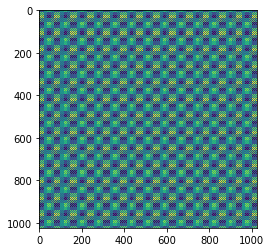

In [39]:
plt.imshow(data1.real)

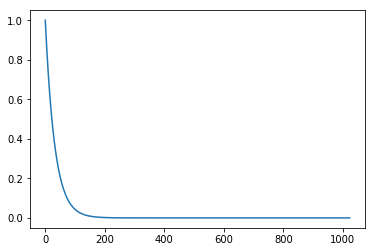

In [40]:
lb=5.0
ttt = np.linspace(0,dt1*t2pts, t2pts)
exp_linebroadening = np.exp(-ttt*lb*2*np.pi)
plt.plot(exp_linebroadening);

In [41]:
data1 = data1*exp_linebroadening
data2 = data2*exp_linebroadening

In [42]:
sss1 = fftpack.fft(data1, axis=1)
sss1 = fftpack.fftshift(sss1,axes=1)

In [43]:
sss2 = fftpack.fft(data2, axis=1)
sss2 = fftpack.fftshift(sss2,axes=1)

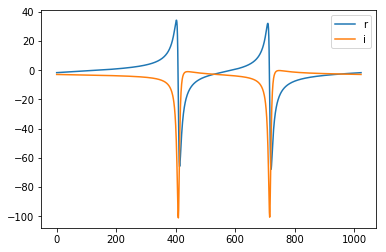

In [51]:
plt.plot(sss1[0].real, label='r')
plt.plot(sss1[0].imag, label='i')
plt.legend();

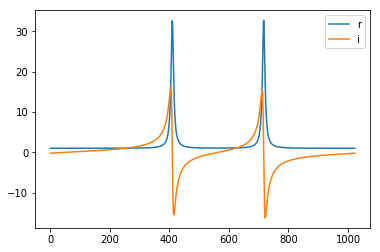

In [52]:
plt.plot(sss2[0].real, label='r')
plt.plot(sss2[0].imag, label='i')
plt.legend();

In [45]:
nmrglue.process.proc_autophase.manual_ps(sss1[0], notebook=True)

interactive(children=(FloatSlider(value=-0.0015926535897929917, description='phcorr0', max=3.141592653589793, …

In [46]:
ph0_1 = 106.649
ph1_1 = -0.34

In [56]:
nmrglue.process.proc_autophase.manual_ps(sss2[0]*1j, notebook=True)

interactive(children=(FloatSlider(value=-0.0015926535897929917, description='phcorr0', max=3.141592653589793, …

In [78]:
ph0_2 = 0
ph1_2 = -0.34

In [79]:
phased_data1 = nmrglue.proc_base.ps(sss1, p0=ph0_1, p1=ph1_1)

In [80]:
phased_data2 = nmrglue.proc_base.ps(sss2, p0=ph0_2, p1=ph1_2)

In [81]:
fid = phased_data1.real + 1j*phased_data2.real

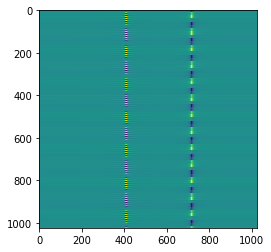

In [82]:
plt.imshow(fid.real)

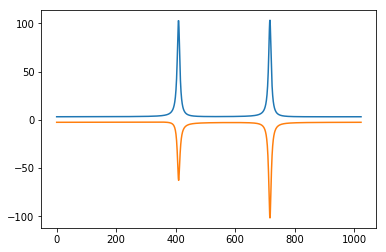

In [83]:
plt.plot(fid[0].real)
plt.plot(fid[-1].real)

In [84]:
fid = fid*exp_linebroadening[:,np.newaxis]

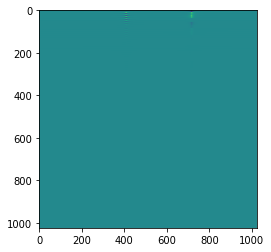

In [85]:
plt.imshow(fid.real)

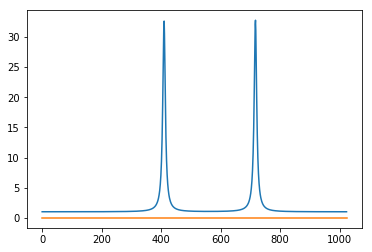

In [86]:
plt.plot(fid[0].imag)
plt.plot(fid[-1].imag)

In [87]:
spec = fftpack.fftshift(fftpack.fft(fid,axis=0), axes=0)

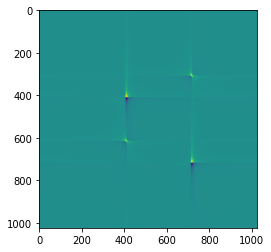

In [88]:
plt.imshow(spec.imag)

In [89]:
class TwoD_NMR_MAT_plot:
    
    def __init__(self, exp, pinfo, info, dimensions_ppm=[]):
        
#        print exp.shape
        
        self.exp = exp
        self.pinfo = pinfo
        self.info  = info
        
        self.rr,self.cc = exp.shape
        self.X = np.zeros(exp.shape)
        self.Y = np.zeros(exp.shape)
        
        r1=0
        r2=self.rr

        c1=0
        c2=self.cc
        
#        print r2,c2
        
        self.create_axes(  pinfo, info, self.rr, self.cc, dimensions_ppm )
          
        self.create_plot_layout(self.dimensions_index)
        
        self.plot_plots()
        

        
    def create_axes( self, pinfo, info, rr,cc, dimensions_ppm):
                
        self.f1_offset_p = pinfo['procs' ]['OFFSET']
        self.f1_sw_hz     = pinfo['procs' ]['SW_p']
        self.f1_omega    = pinfo['procs' ]['SF']
        self.f1_sw_ppm   = self.f1_sw_hz/self.f1_omega
        
        self.f2_offset_p = pinfo['proc2s' ]['OFFSET']
        self.f2_sw_hz     = pinfo['proc2s' ]['SW_p']
        self.f2_omega    = pinfo['proc2s' ]['SF']
        self.f2_sw_ppm   = self.f2_sw_hz/self.f2_omega
#        print self.f1_sw_ppm
        
        self.f1 = np.linspace(self.f1_offset_p, self.f1_offset_p-self.f1_sw_ppm,  self.rr)
        self.f2 = np.linspace(self.f2_offset_p, self.f2_offset_p-self.f2_sw_ppm,  self.cc)
        
        self.dw_f1_ppm = self.f1[1]-self.f1[0]
        self.dw_f2_ppm = self.f2[1]-self.f2[0]
        
        for r in range(self.rr):
    
            for c in range( self.cc):
        
                self.Y[r,c] = self.f1[r]
                self.X[r,c] = self.f2[c] 
                
#        print dimensions_ppm       
        if dimensions_ppm == []:
            self.dimensions_index = np.array([0,self.rr-1,0,self.cc-1])
        else:
            r1 = int( (dimensions_ppm[1]-self.f1_offset_p)/self.dw_f1_ppm)
            r2 = int( (dimensions_ppm[0]-self.f1_offset_p)/self.dw_f1_ppm)
            c1 = int( (dimensions_ppm[2]-self.f2_offset_p)/self.dw_f2_ppm)
            c2 = int( (dimensions_ppm[3]-self.f2_offset_p)/self.dw_f2_ppm)
            
            self.dimensions_index = np.array([r1,r2,c1,c2 ])
            
#        print "self.dimensions_index", self.dimensions_index
            
        self.Z1 = self.exp[self.dimensions_index[0]:self.dimensions_index[1],self.dimensions_index[2]:self.dimensions_index[3]]
        self.X1 =   self.X[self.dimensions_index[0]:self.dimensions_index[1],self.dimensions_index[2]:self.dimensions_index[3]]
        self.Y1 =   self.Y[self.dimensions_index[0]:self.dimensions_index[1],self.dimensions_index[2]:self.dimensions_index[3]]
        
        
    def create_plot_layout( self, dimensions_index):
        
#        print "dimensions_index",dimensions_index
        
        nullfmt   = NullFormatter()         # no labels

        # definitions for the axes
        left, width = 0.1, 0.65
        bottom, height = 0.1, 0.65
        bottom_h = left_h = left+width+0.02

        rect_scatter = [left, bottom, width, height]
        rect_histx = [left, bottom_h, width, 0.2]
        rect_histy = [left_h, bottom, 0.2, height]

        # start with a rectangular Figure
        plt.figure(2, figsize=(6,6))

        self.axScatter = plt.axes(rect_scatter)
        self.axHistx = plt.axes(rect_histx)
        self.axHisty = plt.axes(rect_histy)

# no labels
        self.axHistx.xaxis.set_major_formatter(nullfmt)
        self.axHisty.yaxis.set_major_formatter(nullfmt)
        
        self.axScatter.tick_params(axis='x', labelsize=16)
        self.axScatter.tick_params(axis='y', labelsize=16)
        self.axScatter.set_xlabel('${^1}$H [ppm]',fontsize=16)
        #ax.set_xlim(-60, 60)
        self.axScatter.set_ylabel('${^1}$H [ppm]', fontsize=16)
        
        self.axHistx.axis('off')
        self.axHisty.axis('off')

        f1_start = self.f1[dimensions_index[0]]
        f1_end   = self.f1[dimensions_index[1]]

        f2_start = self.f2[dimensions_index[2]]
        f2_end   = self.f2[dimensions_index[3]]

        self.axScatter.set_ylim( (f1_start, f1_end) )
        self.axScatter.set_xlim( (f2_start, f2_end) )
        
        

    def plot_plots(self):
        
        # the scatter plot:
        cl = np.linspace(self.Z1.max()*0.01, self.Z1.max()*1.1,10)
#        print "Z1.shape",self.Z1.shape
        

        sum_f1 = self.Z1.sum(axis=0)
#        print "len(sum_f1)",len(sum_f1)
        sum_f2 = self.Z1.sum(axis=1)
#        print "len(sum_f2)",len(sum_f2)

        cset = self.axScatter.contour(self.X1, self.Y1, self.Z1,  cl,  colors='red')
        #
        self.axHistx.plot(sum_f1, 'r-')
        self.axHisty.plot(sum_f2,range(len(sum_f2)),'r')


        self.axHistx.set_xlim( (0,len(sum_f1)-1) )
        self.axHisty.set_ylim( (0,len(sum_f2)-1) )        
        


In [90]:
info = {}
pinfo = {}

pinfo['procs']={}
pinfo['proc2s']={}



In [91]:
pinfo['procs']['OFFSET']=1.25

In [92]:
pinfo['procs' ]['SW_p']=1.0/dt1

In [93]:
pinfo['procs' ]['SF']=sys.spectrometer_frequency()

In [94]:
pinfo['proc2s' ]['OFFSET'] =1.25
pinfo['proc2s' ]['SW_p']=1.0/dt2
pinfo['proc2s' ]['SF']=sys.spectrometer_frequency()

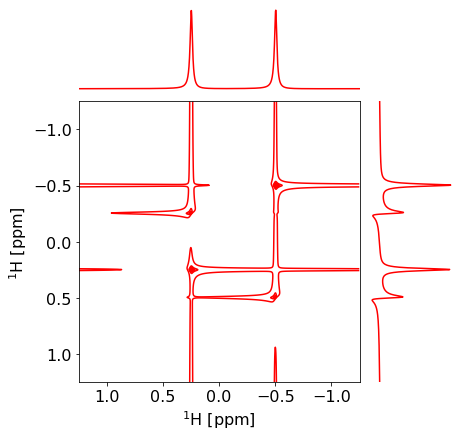

In [95]:
ppplot = TwoD_NMR_MAT_plot(1*spec.real, pinfo, info )

In [33]:
print(dir(nmrglue))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'agilent', 'analysis', 'analysisbase', 'bruker', 'convert', 'fileio', 'fileiobase', 'helpers', 'integration', 'jcampdx', 'leastsqbound', 'linesh', 'lineshapes1d', 'misc', 'nmrml', 'peakpick', 'pipe', 'pipe_proc', 'proc_autophase', 'proc_base', 'proc_bl', 'proc_lp', 'process', 'rnmrtk', 'segmentation', 'simpson', 'sparky', 'table', 'tecmag', 'util', 'varian']


In [34]:
nmrglue.process.proc_autophase.manual_ps(spec, notebook=True)

interactive(children=(FloatSlider(value=-0.0015926535897929917, description='phcorr0', max=3.141592653589793, …